### Plot faculty hiring distribution by city

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)
from postdocsalary.paths import save_fig, FIGURE_DIR

In [11]:
CBSA_df = pd.read_pickle(DATA_DIR/ 'CBSA_df_salary.pickle')

In [12]:
CBSA_df[:3]

,CBSA_NAME,RPP_all,total_hires,prop_hires,cum_hires,n_uni,n_grad,prop_grad,cum_grad,hiring_grad_disparity,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
2,"Boston-Cambridge-Newton, MA-NH",115.5,1604.0,0.115679,0.115679,10,2325.0,0.059061,0.059061,0.056618,55474.915479,1683,55932.677979,55205.642506,48030.229852,48426.561021,47797.093079
0,"Chicago-Naperville-Elgin, IL-IN-WI",102.8,919.0,0.066277,0.181956,6,1506.0,0.038256,0.097317,0.028021,53336.489989,1504,53830.036471,52850.139016,51883.745125,52363.848707,51410.641066
6,"New York-Newark-Jersey City, NY-NJ-PA",125.7,854.0,0.061589,0.243545,5,1268.0,0.032211,0.129528,0.029379,55891.553082,2245,56013.506891,55328.923560,44464.242706,44561.262443,44016.645632


In [13]:
import seaborn as sns

In [15]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

### Top cities by RPP

In [16]:
nex = 10
top_n = len(CBSA_df)

In [26]:
overall_median_salary = 53100.08961257449
overall_median_real_salary = 51848.669708466055

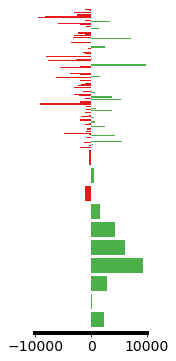

In [58]:
xlim = [-10000, 10000]
metric = "MEDIAN_SALARY"
sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 6),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 1.3]},
)

ax = axs[0]
#ax.axvline(0, color='k', lw=3)

y = CBSA_df[metric].values[sort_mask][nex:top_n] - overall_median_salary
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[pal[0] if np.sign(i) < 0 else pal[2] for i in y],
)
ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = CBSA_df[metric].values[sort_mask][:nex] - overall_median_salary
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[pal[0] if np.sign(i) < 0 else pal[2] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
#ax.axvline(0, color='k', lw=3)

save_fig(FIGURE_DIR / 'city_salary')

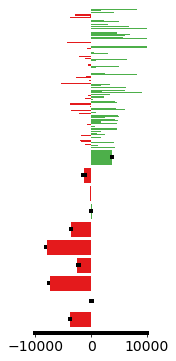

In [59]:
xlim = [-10000, 10000]
metric = "REAL_MEDIAN_SALARY"
sort_mask = np.argsort(CBSA_df["total_hires"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 6),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 1.3]},
)

ax = axs[0]
#ax.axvline(0, color='k', lw=3)

y = CBSA_df[metric].values[sort_mask][nex:top_n] - overall_median_real_salary
ax.barh(
    np.arange(len(CBSA_df))[nex:top_n],
    y,
    color=[pal[0] if np.sign(i) < 0 else pal[2] for i in y],
)
ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = CBSA_df[metric].values[sort_mask][:nex] - overall_median_real_salary
ax.barh(
    np.arange(len(CBSA_df))[:nex] + 1,
    y,
    color=[pal[0] if np.sign(i) < 0 else pal[2] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            CBSA_df["CBSA_NAME"].values[sort_mask][:nex],
            CBSA_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
    
xerr = np.array((
        y+ overall_median_real_salary - CBSA_df.REAL_MEDIAN_SALARY_LOWER.values[sort_mask][
            :nex
        ],
        y +overall_median_real_salary- CBSA_df.REAL_MEDIAN_SALARY_UPPER.values[sort_mask][
            :nex
        ],
    ))
xerr[1,:] *= -1
ax.errorbar(
    y,
    np.arange(len(CBSA_df))[:nex] + 1,
    xerr=xerr,
    ls='none',
    color = 'k',
    lw = 4
    
)
    
    
# ax.set_yticklabels(CBSA_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
#ax.axvline(0, color='k', lw=3)

save_fig(FIGURE_DIR / 'city_real_salary')